# Clusterização

O agrupamento  é uma técnica para dividir os dados  em diferentes grupos, na qual os registros em cada grupo são semelhantes uns aos outros. Os grupos podem ser usados diretamente, analisando mais a fundo ou passados como uma característica ou resultado para um modelo de regressão ou classificação.
## Grupo de Consumidores

Vamos aprender a realizar um modelo de clusterização utilizando um case de segmentação de clientes de um shopping. Como podemos criar grupos de consumidores dado algumas caracteríticas de perfis?

## Sobre a base de dados:

Esse conjunto de dados ilustra alguns dados dos consumidores de um shopping. A base possui algumas features como: gênero, idade, renda anual e pontuação de gastos.


### Bibliotecas utilizadas

In [31]:
import pandas as pd

# Plot dos gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN

# Avaliacao de desemepnho
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Algumas principais técnicas de clusterização



In [32]:
dados = pd.read_csv("mall.csv", sep=',')

In [33]:
dados.shape

(200, 5)

In [34]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Limpeza dos dados

In [35]:
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Análise exploratória dos dados

- Conhecer os dados, identificar padrões, encontrar anomalias, etc.

In [36]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
dados['Annual Income (k$)'].median()

61.5

Analisando a distribuição das variáveis:

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

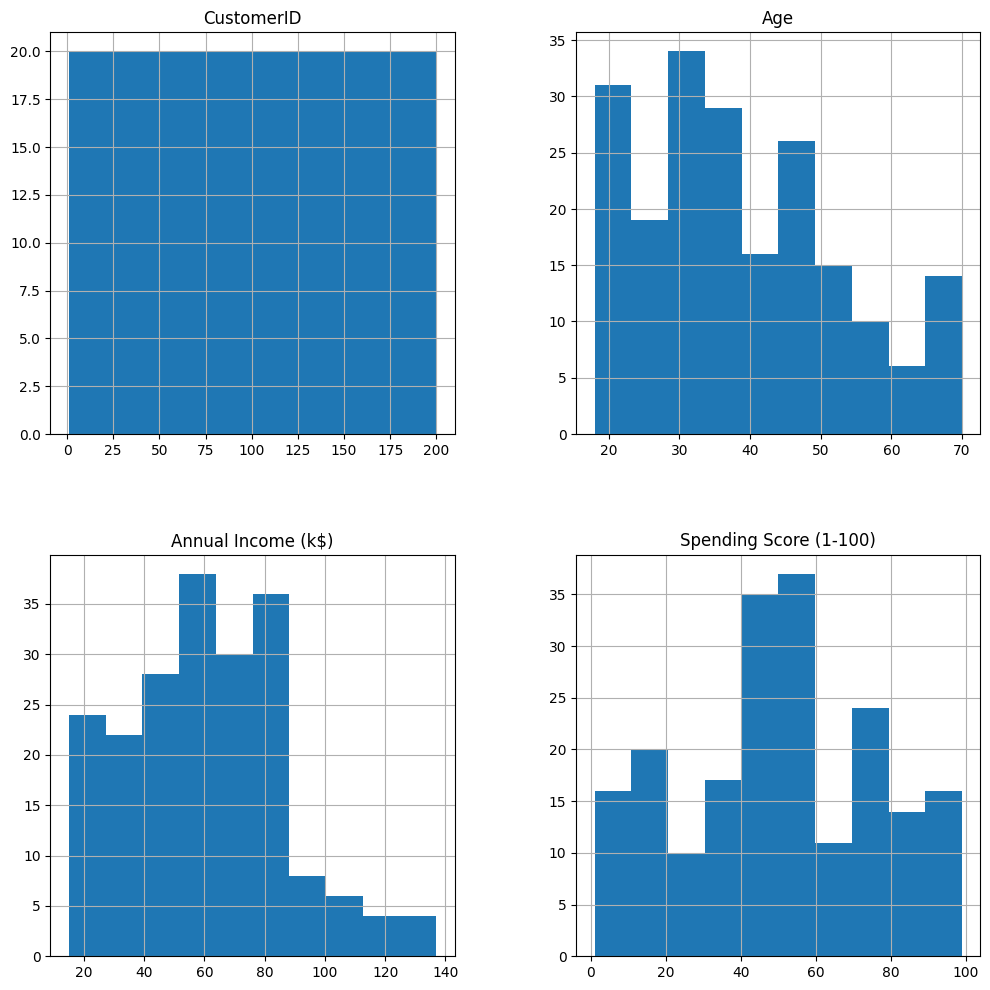

In [38]:
dados.hist(figsize=(12,12))

Analisando a correlação entre as variáveis:

<Axes: >

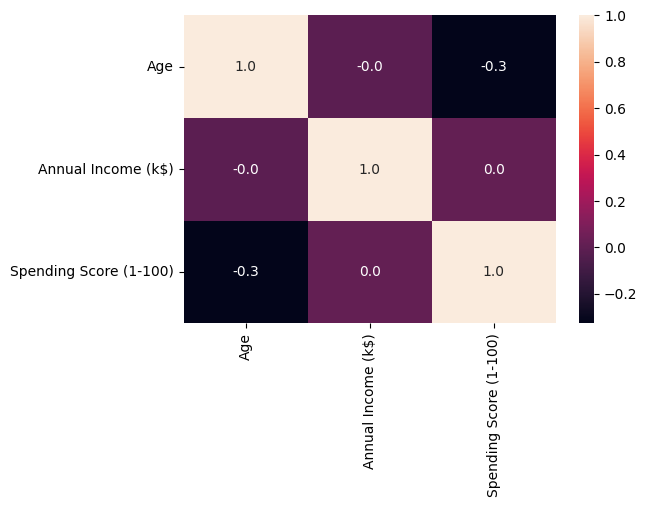

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(dados[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method = 'pearson'), annot=True, fmt=".1f")

Analisando a proporção entre gêneros:

In [40]:
dados['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Boa proporção entre os generos que temos disponíveis em nossos dados.

Vamos fazer um gráfico completo com todos os dados para checarmos possíveis agrupamentos que podem ser realizados.

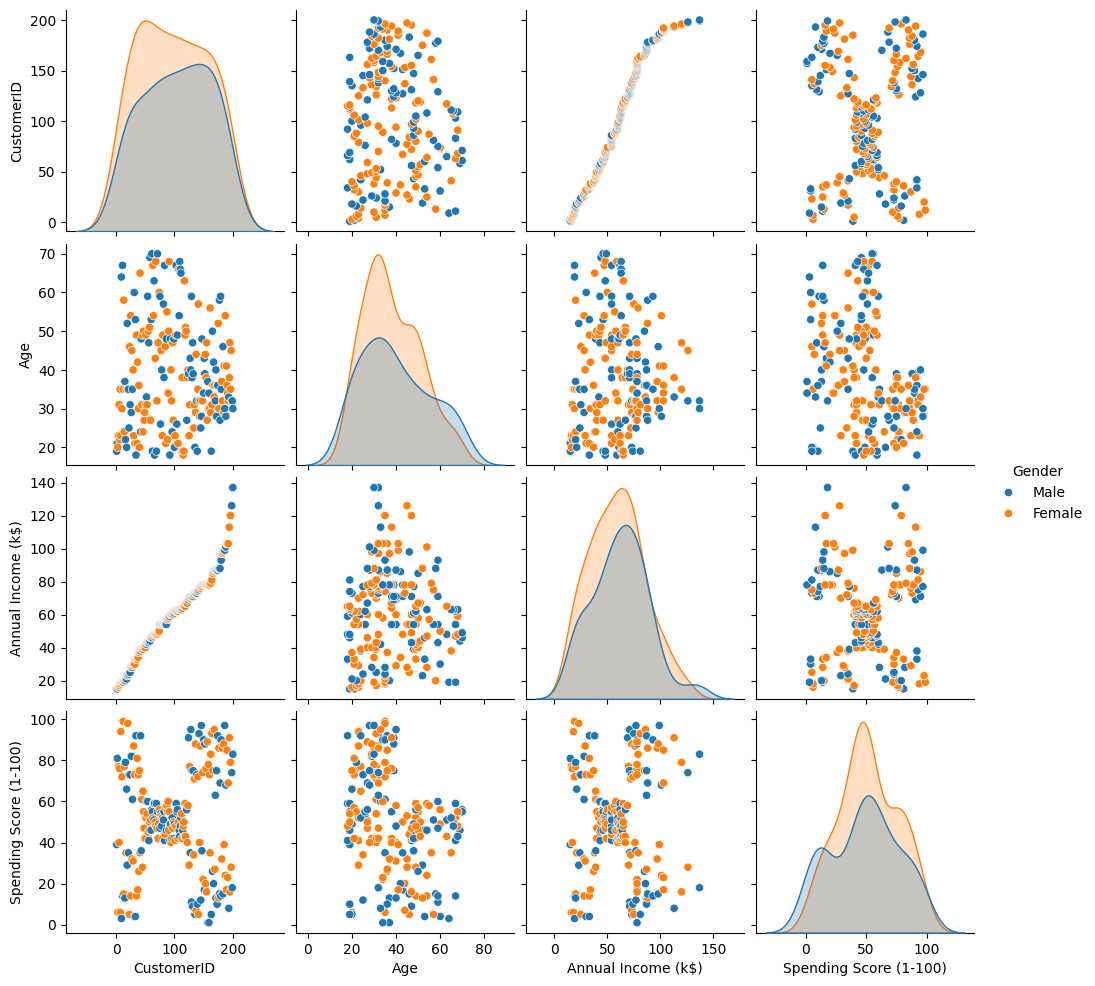

In [41]:
sns.pairplot(dados, hue="Gender")
plt.show()

Aparentemente o Annual Income e o Spending Score permitem alguns agrupamentos dos nossos dados. 

Podemos trabalhar com eles.

## Feature Scaling

Verificar a necessidade de utilizar a padronização ou normalização dos dados

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer

In [43]:
scaler = StandardScaler() 
#scaler = MinMaxScaler() 
scaler.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

StandardScaler()

In [44]:
dados_Escalonados = scaler.transform(dados[['Annual Income (k$)','Spending Score (1-100)']])

In [45]:
dados_Escalonados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Criando os agrupamentos
Vamos criar agrupamentos com diferentes metodologias:

### 1 - K-Means

**Sobre o modelo:**
O K-Means parte da ideia de quebrar o espaço multidimensional de dados em partições a partir do centróide dos dados. Após inicializar os centróides de forma aleatória sobre os dados, o K-Means **calcula a distância dos dados para os centros mais próximos**. Esse cálculo da distância é realizado várias vezes até que os dados sejam agrupados da melhor forma possível de acordo com a distância mais próxima de um centróide (ponto centro de dado na qual será formado o grupo).

**Hiperparametros:**
Definição do K. Para definir esse valor de K, é necessário utilizar o **método Elbow** para encontrar o melhor hiperparâmetros de K. O método Elbow consiste no cálculo da soma dos erros quadráticos.

**Vantagens:**
Implementação simplificado e possui uma certa facilidade em lidar com qualquer medida de similaridade entre os dados.

**Desvantagem:**
Difícil definir o melhor K. Sensível a outliers. Não consegue distinguir grupos em dados não-globulares.

Para mais informação: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Executando o algoritmo sem feature scaling

In [46]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0) #definindo os hiperparametros do algoritmo (definir o número de grupo = cluster)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

Executando com feature scaling

In [47]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans_escalonados = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados_Escalonados)

#Salvando os centroides de cada cluster
centroides_escalonados = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels_escalonado = kmeans.predict(dados_Escalonados)

In [48]:
dados_Escalonados = pd.DataFrame(dados_Escalonados, columns = ['Annual Income (k$)','Spending Score (1-100)'])

In [49]:
dados_Escalonados.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [50]:
dados_Escalonados['Grupos'] = kmeans_labels_escalonado
dados_Escalonados.head()

,Annual Income (k$),Spending Score (1-100),Grupos
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,5
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,5
4,-1.662660,-0.395980,3


In [51]:
dados['Grupos'] = kmeans_labels
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
0,1,Male,19,15,39,3
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,5
4,5,Female,31,17,40,3


Vamos analisar a nossa previsao e os centroides:

In [52]:
pd.Series(kmeans_labels).value_counts()

0    49
4    39
1    39
2    32
3    21
5    20
Name: count, dtype: int64

In [53]:
centroides #espaço tridimensional (salário e score de gasto)

array([[62.73469388, 46.91836735],
       [86.53846154, 82.12820513],
       [89.40625   , 15.59375   ],
       [25.14285714, 19.52380952],
       [45.51282051, 51.51282051],
       [24.95      , 81.        ]])

### Clusters com feature scaling

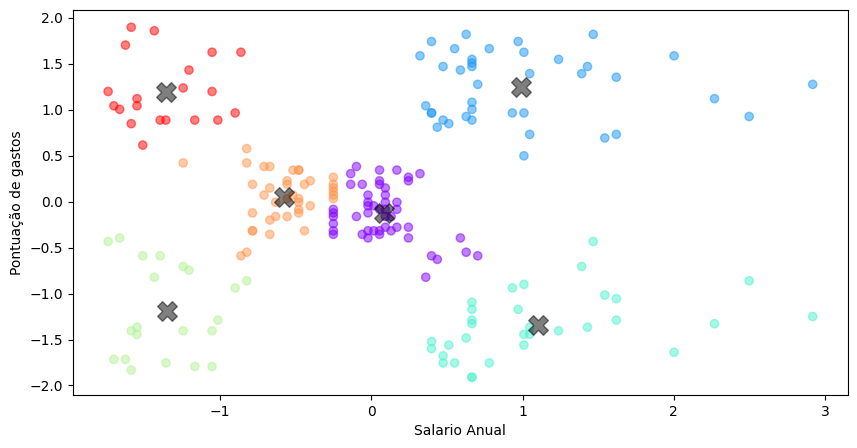

In [54]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados_Escalonados[['Annual Income (k$)']],dados_Escalonados[['Spending Score (1-100)']], c=kmeans_labels_escalonado, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

# plotando os centroides
plt.scatter(centroides_escalonados[:, 0], centroides_escalonados[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

### Clusters sem feature scaling

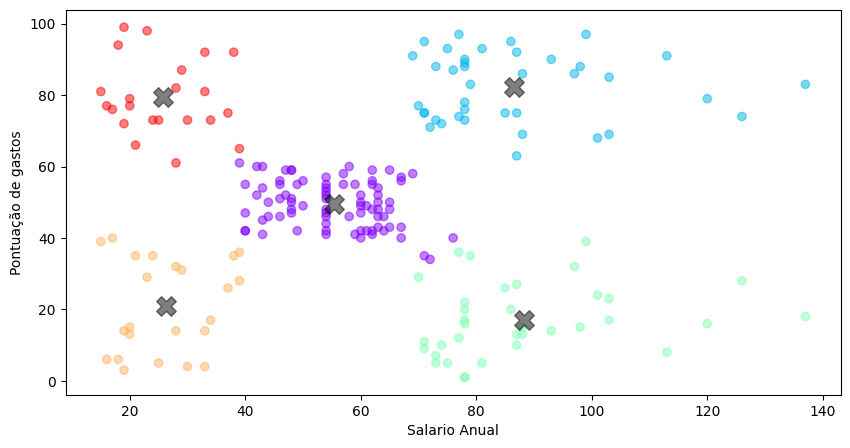

In [75]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

Escolhendo a quantidade de grupos usando o método do "cotovelo":

In [56]:
# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


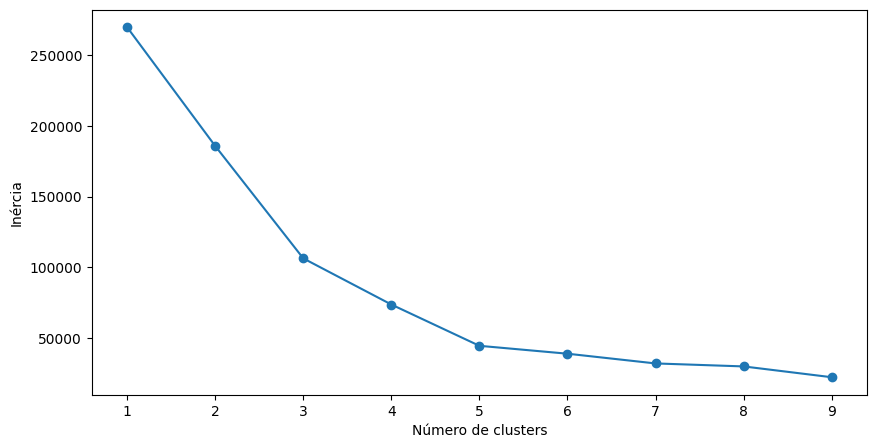

In [57]:
# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmeans.inertia_) #calculo do erro do k-mens (mudar o centroide dos dados)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

In [58]:
dados.groupby('Grupos')['Age'].mean()

Grupos
0    41.836735
1    32.692308
2    41.000000
3    44.142857
4    43.820513
5    24.850000
Name: Age, dtype: float64

In [59]:
dados.groupby('Grupos')['Annual Income (k$)'].mean()

Grupos
0    62.734694
1    86.538462
2    89.406250
3    25.142857
4    45.512821
5    24.950000
Name: Annual Income (k$), dtype: float64

Podemos notar que após 3 ou 5 clusters a soma do erro quadratico tem uma redução na forma com a qual a função está decrescendo. Assim podemos adotar 5 clusters. Checando os resultados para 5 clusters:

In [60]:
# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=5,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

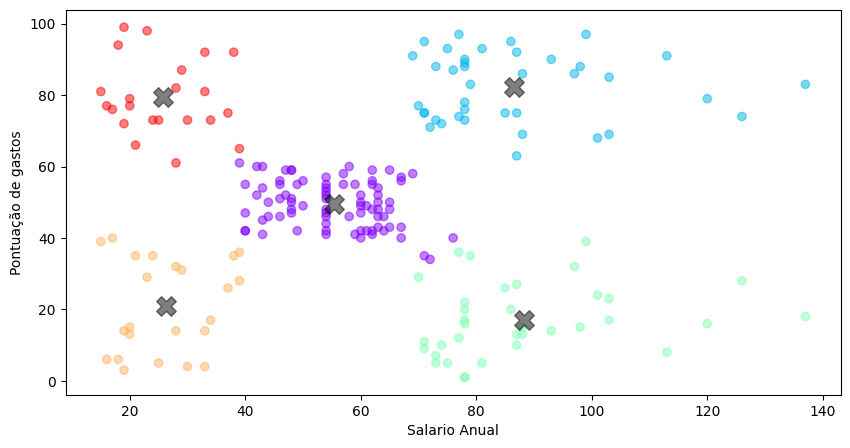

In [61]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

In [62]:
dados_grupo_1 = dados[dados['Grupos'] == 1]
dados_grupo_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
133,134,Female,31,72,71,1
135,136,Female,29,73,88,1
137,138,Male,32,73,73,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


In [63]:
dados_grupo_2 = dados[dados['Grupos'] == 2]

In [64]:
dados_grupo_3 = dados[dados['Grupos'] == 3]

In [65]:
dados_grupo_4 = dados[dados['Grupos'] == 4]

In [66]:
dados_grupo_1['Annual Income (k$)'].mean() #grupo 1 azul

86.53846153846153

In [67]:
dados_grupo_2['Annual Income (k$)'].mean() #grupo 2 roxo

89.40625

In [68]:
dados_grupo_3['Annual Income (k$)'].mean() #grupo 3 laranja

25.142857142857142

In [69]:
dados_grupo_3['Age'].mean()

44.142857142857146

In [70]:
dados_grupo_2['Age'].mean() #grupo 2 roxo

41.0

In [71]:
dados_grupo_4['Annual Income (k$)'].mean() #grupo 4 vermelho

45.51282051282051

In [72]:
dados_grupo_3['Spending Score (1-100)'].mean() #grupo 4

19.523809523809526

In [76]:
plt.figure(figsize=(6,4))
sns.heatmap(dados_grupo_1.groupby('Grupos').corr(method = 'pearson'), annot=True, fmt=".1f");

ValueError: could not convert string to float: 'Male'

<Figure size 600x400 with 0 Axes>

### 2 - DBSCAN

**Sobre o modelo:**
O DBSCAN é um algoritmo que agrupa os dados com base em **densidade (alta concentração de dados)**. Muito bom para tirar ruídos. O agrupamentos dos dados é calculado com base nos core (quantidade de pontos mínmos que seja igual ou maior a definição do MinPts), border (ponto de fronteira dos dados) e noise (ruído).

**Hiperparametro:**
Eps (raio ao redor de um dado). MinPts (mínimo de pontos dentro do raio para que seja agrupado).

**Vantagem:**
Capacidade de trabalhar com outliers. Trabalha com base de dados grande.

**Desvantagem:**
Dificuldade para lidar com cluster dentro de cluster. Dificuldade para lidar com dados de alta dimensionalidade. Dificuldade em encontrar o raio de vizinhança ao tentar agrupar dados com distância média muito distinta (clusters mais densos que outros).

Para mais informação: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html 

In [ ]:
#Criando o modelo:
dbscan = DBSCAN(eps=10, min_samples=8)
#Ajustando aos dados
dbscan.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels


array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Labels com -1 foram classificados como outliers

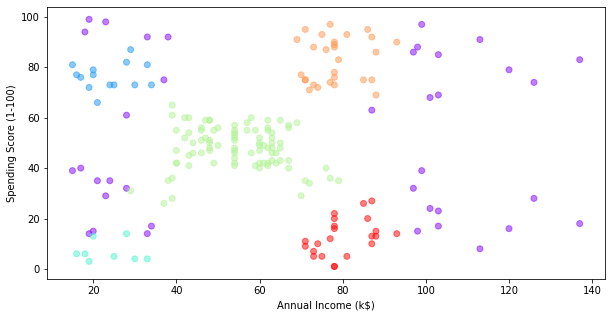

In [ ]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

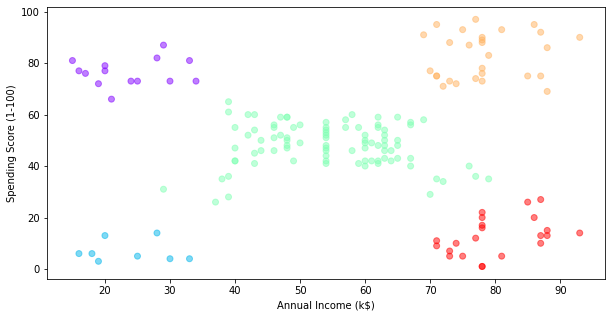

In [ ]:
#Plotando o grafico sem os outliers:
#mascara para outlier
mascara = dbscan_labels>=0

#plotando o gráfico
plt.scatter(dados[['Annual Income (k$)']][mascara],dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Checando a quantidade de valores que foram classificados como Outliers:

In [ ]:
list(mascara).count(False)

38

## Como validar uma clusterização?

Temos dois tipos:
- Interna: Quanto bom foi o meu agrupamento?
- Externa: Como parecido estão os meus dois algoritmos comparados?

### Avaliando o Desempenho dos Algoritmos

### Tipo Externo:

(a) Usando o **Adjusted Rand Index**

Compara o desempenho quando forem fornecidos datasets com labels geradas de forma aleatória. Quando essas labels estão muito diferente, o valor se aproxima de 0, o que sugere um resultado negativo, ou seja, clusters não próximos.

Comparação entre K-Means e DBSCAN:

In [ ]:
adjusted_rand_score(kmeans_labels,dbscan_labels)

0.7151933782093212

#### Tipo interno:

(b) Avaliando a métrica de **Silhouette**

Mede o formato do cluster obtido: avalia a distância entre os centros dos clusters, nesse caso, queremos maximizar as distâncias)

Valores próximos a -1, significa clusters ruins, próximo a 1, clusters bem separados.

KMEANS:

In [ ]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],kmeans_labels)

0.553931997444648

DBSCAN:

In [ ]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],dbscan_labels)

0.36328873885121793